In [1]:
#k-近邻算法，数据挖掘中原理最简单的算法，
#KNN原理：给定一个已知标签的训练数据集，输入没有标签的新数据后，在训练数据集中找到与新数据最邻近的k个实例
#如果这K个实例多数属于某个类别，那么数据就属于这个类别，
#可以简单理解为：由哪些离x最近的k个点投票决定x归属为哪一类

In [2]:
#d=Sum(x-xi)**2


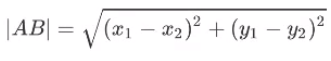

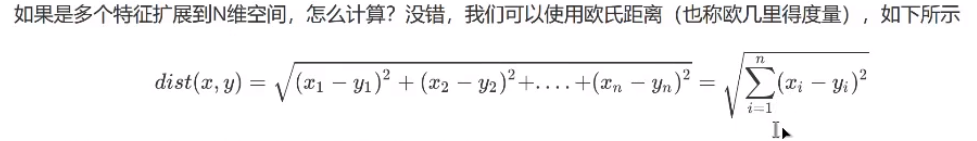

In [3]:
#KNN 步骤
# 1.计算已知类别的数据集中的点与当前点之间的距离
# 2.按照距离递增次序排序
# 3.选取与当前点距离最小的k个点
# 4.确定k个点所在类别的出现频率
# 5.返回前k个点出现频率最高的类别作为当前的预测类别

In [4]:
import numpy as np
import pandas as pd

In [5]:
rowdata={
    "电影名称":["无问东西","后来的我们","前任三","红海行动","唐人街探案","战狼2"],
    "打斗镜头":[1,5,12,108,112,115],
    "接吻镜头":[101,89,97,5,9,8],
    "电影类型":["爱情片","爱情片","爱情片","动作片","动作片","动作片"]
}

#转化为dataFrame
movie_data=pd.DataFrame(rowdata)
movie_data

,电影名称,打斗镜头,接吻镜头,电影类型
0,无问东西,1,101,爱情片
1,后来的我们,5,89,爱情片
2,前任三,12,97,爱情片
3,红海行动,108,5,动作片
4,唐人街探案,112,9,动作片
5,战狼2,115,8,动作片


In [6]:
#计算距离
new_data=[24,67]
dist=list((((movie_data.iloc[:,1:3]-new_data)**2).sum(1))**0.5)

In [7]:
dist

[41.048751503547585,
 29.068883707497267,
 32.31098884280702,
 104.4030650891055,
 105.39449701004318,
 108.45275469069469]

In [10]:
#进行排序,选取最近的4个点
dist_l=pd.DataFrame({'dist':dist,'labels':movie_data.iloc[:,-1]})

In [11]:
dist_l

,dist,labels
0,41.048752,爱情片
1,29.068884,爱情片
2,32.310989,爱情片
3,104.403065,动作片
4,105.394497,动作片
5,108.452755,动作片


In [12]:
dr=dist_l.sort_values(by='dist')#使用dist排序

In [13]:
dr

,dist,labels
1,29.068884,爱情片
2,32.310989,爱情片
0,41.048752,爱情片
3,104.403065,动作片
4,105.394497,动作片
5,108.452755,动作片


In [14]:
re=dr.loc[:4,'labels'].value_counts()

In [15]:
re

爱情片    3
动作片    2
Name: labels, dtype: int64

In [16]:
###方法封装

In [ ]:
""""
new_data:新数据
data_set:训练集
labels:标签属性
files:属性
""""
def classfiy_knn(new_data,data_set,labels,files):
    #1.构造data_set
    